In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
from data_mung import data_mung
# from sklearn import preprocessing
# from sklearn import model_selection
# from sklearn import linear_model as LM
# from sklearn import ensemble
# from sklearn import neighbors
# from sklearn import decomposition
# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load and Clean Data

In [2]:
top_dir = '/project'
data_dir = os.path.join(top_dir, 'data')
raw_data_dir = os.path.join(data_dir, 'raw')
os.listdir(raw_data_dir)

['supp_table1.xlsx',
 'supp_table4.xlsx',
 'SRAdb.mysqldump',
 'Final_metadata_4347.csv',
 'ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh',
 '4347_final_relative_abundances.txt']

In [3]:
preproc_dir = os.path.join(data_dir, 'preprocessed')
output_dir = os.path.join(preproc_dir, 'Gupta_2020_Precompiled_Cleaned')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [4]:
MetaData = pd.read_csv(os.path.join(raw_data_dir, 'Final_metadata_4347.csv'))
MetaData

,study,V-2_ACVD,V-2_ACVD.1,V-2_ACVD.2,V-2_ACVD.3,V-2_ACVD.4,V-2_ACVD.5,V-2_ACVD.6,V-2_ACVD.7,V-2_ACVD.8,...,V-32_Underweight,V-32_Underweight.1,V-43_Underweight,V-46_Underweight,S-4_Underweight,S-7_Underweight,S-7_Underweight.1,S-7_Underweight.2,S-7_Underweight.3,S-7_Underweight.4
0,study,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,...,V-32_Underweight,V-32_Underweight,V-43_Underweight,V-46_Underweight,S-4_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight
1,Study No. (From VG sheet (V-*) from SB sheet (...,V-2,V-2,V-2,V-2,V-2,V-2,V-2,V-2,V-2,...,V-32,V-32,V-43,V-46,S-4,S-7,S-7,S-7,S-7,S-7
2,Title of Paper,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,...,The gut microbiome of healthy Japanese and its...,The gut microbiome of healthy Japanese and its...,Colorectal Cancer and the Human Gut Microbiome...,Richness of human gut microbiome correlates wi...,Human microbiome signatures of differential co...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...
3,Author (year),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),...,Nishijima (2016),Nishijima (2016),Vogtmann (2016),Le Chatelier (2013),Guthrie (2017),He (2017),He (2017),He (2017),He (2017),He (2017)
4,Journal,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,...,DNA research,DNA research,PLoS One,Nature,npj(biofilms and Microbiome,Gigascience,Gigascience,Gigascience,Gigascience,Gigascience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,s__Veillonella_atypica,0.003428,4.502121,0.0,0.001396,0.012939,0.011271,0.0,0.027368,0.0,...,0.021086,0.6231,0.070712,0.0,0.0,0.032285,0.0,0.08658,0.0,0.0
341,s__Veillonella_dispar,0.001997,0.122268,0.0,0.001766,0.000238,0.0,0.0,0.008611,0.0,...,0.0,0.016456,0.00446,0.0,0.0,0.058717,0.001255,0.036647,0.0,0.0
342,s__Veillonella_parvula,0.134307,1.75344,0.004011,0.145084,0.016345,0.134893,0.01161,0.030163,0.000294,...,0.135108,0.256123,0.041187,0.0,0.001479,0.10368,0.312764,0.082732,0.00855,0.016734
343,s__Weissella_cibaria,0.337587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# manually inspecting in exxcel, we see that up to row 32, there's metadata. Everything else is just selected species
MetaData.head(32)

,study,V-2_ACVD,V-2_ACVD.1,V-2_ACVD.2,V-2_ACVD.3,V-2_ACVD.4,V-2_ACVD.5,V-2_ACVD.6,V-2_ACVD.7,V-2_ACVD.8,...,V-32_Underweight,V-32_Underweight.1,V-43_Underweight,V-46_Underweight,S-4_Underweight,S-7_Underweight,S-7_Underweight.1,S-7_Underweight.2,S-7_Underweight.3,S-7_Underweight.4
0,study,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,V-2_ACVD,...,V-32_Underweight,V-32_Underweight,V-43_Underweight,V-46_Underweight,S-4_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight,S-7_Underweight
1,Study No. (From VG sheet (V-*) from SB sheet (...,V-2,V-2,V-2,V-2,V-2,V-2,V-2,V-2,V-2,...,V-32,V-32,V-43,V-46,S-4,S-7,S-7,S-7,S-7,S-7
2,Title of Paper,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,The gut microbiome in atherosclerotic cardiova...,...,The gut microbiome of healthy Japanese and its...,The gut microbiome of healthy Japanese and its...,Colorectal Cancer and the Human Gut Microbiome...,Richness of human gut microbiome correlates wi...,Human microbiome signatures of differential co...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...,Two distinct metacommunities characterize the ...
3,Author (year),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),Jie (2017),...,Nishijima (2016),Nishijima (2016),Vogtmann (2016),Le Chatelier (2013),Guthrie (2017),He (2017),He (2017),He (2017),He (2017),He (2017)
4,Journal,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,Nature communications,...,DNA research,DNA research,PLoS One,Nature,npj(biofilms and Microbiome,Gigascience,Gigascience,Gigascience,Gigascience,Gigascience
5,Study Accession,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,PRJEB21528,...,PRJDB3601,PRJDB3601,PRJEB12449,PRJEB4336,PRJNA373879,PRJEB15371,PRJEB15371,PRJEB15371,PRJEB15371,PRJEB15371
6,Sample Accession or Sample ID,SAMEA104142287,SAMEA104142288,SAMEA104142293,SAMEA104142291,SAMEA104142284,SAMEA104142295,SAMEA104142296,SAMEA104142297,SAMEA104142298,...,SAMD00036377,SAMD00036388,SAMEA3879579,SAMEA2158542,SAMN07534319,SAMEA4431948,SAMEA4431949,SAMEA4431951,SAMEA4431964,SAMEA4431982
7,Sample title (ENA/SRA),ZSL-004,ZSL-007,ZSL-010,ZSL-011,ZSL-019,ZSL-023,ZSL-024,ZSL-025,ZSL-028,...,apr10S00,apr16S00,MMRS17603756ST-27-0-0,MetaHIT-MH0318,K,SZAXPI029564-74,SZAXPI029565-77,SZAXPI029567-80,SZAXPI029580-98,SZAXPI029597-158
8,Sample title (Paper),ZSL-004,ZSL-007,ZSL-010,ZSL-011,ZSL-019,ZSL-023,ZSL-024,ZSL-025,ZSL-028,...,hpr10,hpr16,MMRS17603756ST,MH0318,K,SZAXPI029564-74,SZAXPI029565-77,SZAXPI029567-80,SZAXPI029580-98,SZAXPI029597-158
9,Subject Id (If available),ZSL-004,ZSL-007,ZSL-010,ZSL-011,ZSL-019,ZSL-023,ZSL-024,ZSL-025,ZSL-028,...,hpr10,hpr16,MMRS17603756ST,MH0318,K,GZCT014,GZCT015,GZCT017,GZCT030,GZCT049


In [6]:
MetaData.shape

(345, 4348)

In [7]:
MatrixData = pd.read_csv(os.path.join(raw_data_dir, '4347_final_relative_abundances.txt'), delimiter = '\t', index_col = 0)
MatrixData

,ACVD_1,ACVD_2,ACVD_3,ACVD_4,ACVD_5,ACVD_6,ACVD_7,ACVD_8,ACVD_9,ACVD_10,...,Underweight_4338,Underweight_4339,Underweight_4340,Underweight_4341,Underweight_4342,Underweight_4343,Underweight_4344,Underweight_4345,Underweight_4346,Underweight_4347
s__Abiotrophia_defectiva,0.01142,0.0,0.00088,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.03048,0.0,0.0,0.0,0.0,0.00031,0.0,0.0,0.0,0.0
s__Acetobacter_unclassified,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Achromobacter_piechaudii,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Achromobacter_unclassified,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Achromobacter_xylosoxidans,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s__Weissella_koreensis,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Weissella_paramesenteroides,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Weissella_unclassified,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00806,0.03039,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
s__Wohlfahrtiimonas_chitiniclastica,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [8]:
MatrixData.shape

(903, 4347)

In [9]:
MatrixData.index.values

array(['s__Abiotrophia_defectiva', 's__Acetobacter_unclassified',
       's__Achromobacter_piechaudii', 's__Achromobacter_unclassified',
       's__Achromobacter_xylosoxidans', 's__Acidaminococcus_fermentans',
       's__Acidaminococcus_intestini', 's__Acidaminococcus_sp_BV3L6',
       's__Acidaminococcus_sp_D21', 's__Acidaminococcus_sp_HPA0509',
       's__Acidaminococcus_unclassified', 's__Acinetobacter_baumannii',
       's__Acinetobacter_beijerinckii', 's__Acinetobacter_guillouiae',
       's__Acinetobacter_johnsonii', 's__Acinetobacter_junii',
       's__Acinetobacter_lwoffii', 's__Acinetobacter_parvus',
       's__Acinetobacter_pittii_calcoaceticus_nosocomialis',
       's__Acinetobacter_soli', 's__Acinetobacter_unclassified',
       's__Acinetobacter_ursingii', 's__Actinobacillus_unclassified',
       's__Actinobaculum_massiliense', 's__Actinobaculum_schaalii',
       's__Actinobaculum_sp_oral_taxon_183',
       's__Actinomyces_cardiffensis', 's__Actinomyces_europaeus',
       '

In [10]:
MatrixData.iloc[:, 12]

s__Abiotrophia_defectiva               0.01209
s__Acetobacter_unclassified            0.00000
s__Achromobacter_piechaudii            0.00000
s__Achromobacter_unclassified          0.00000
s__Achromobacter_xylosoxidans          0.00000
                                        ...   
s__Weissella_koreensis                 0.00000
s__Weissella_paramesenteroides         0.00000
s__Weissella_unclassified              0.00000
s__Wohlfahrtiimonas_chitiniclastica    0.00000
s__Yersinia_enterocolitica             0.00000
Name: ACVD_13, Length: 903, dtype: float64

In [11]:
MatrixDataClean = MatrixData.to_numpy().T.astype('float64')
MatrixDataClean

array([[0.01142, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.00088, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [12]:
FeatMetaDataClean = pd.DataFrame(data = {'feature': MatrixData.index.values.astype('str')}, index = MatrixData.index)
FeatMetaDataClean

,feature
s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
s__Acetobacter_unclassified,s__Acetobacter_unclassified
s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
s__Achromobacter_unclassified,s__Achromobacter_unclassified
s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans
...,...
s__Weissella_koreensis,s__Weissella_koreensis
s__Weissella_paramesenteroides,s__Weissella_paramesenteroides
s__Weissella_unclassified,s__Weissella_unclassified
s__Wohlfahrtiimonas_chitiniclastica,s__Wohlfahrtiimonas_chitiniclastica


In [13]:
SampleMetaDataTransposed = MetaData.head(32).transpose()
SampleMetaDataClean = pd.DataFrame(data = SampleMetaDataTransposed.iloc[1:SampleMetaDataTransposed.shape[0], :].to_numpy(), 
                                   index = SampleMetaDataTransposed.iloc[1:SampleMetaDataTransposed.shape[0], 6],
                                  columns = SampleMetaDataTransposed.iloc[0,:].to_numpy())
SampleMetaDataClean

,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),Subject Id (If available),...,Residence (Rural/Urban),Use of milk or milk products (Yes/No/Sometimes),Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan),Alcohol Consumption (Yes/No),Diet1,Intervention for study (Diet),Intervention for study (medication),Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control
6,,,,,,,,,,,,,,,,,,,,,
SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,ZSL-004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,43356775
SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,ZSL-007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,41073871
SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,ZSL-010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,40199673
SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,ZSL-011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,31054158
SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,ZSL-019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,36081150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA4431948,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,GZCT014,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,52212493
SAMEA4431949,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,GZCT015,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,50635879
SAMEA4431951,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,GZCT017,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,40712962


In [14]:
SampleMetaDataClean.keys()

Index(['study', 'Study No. (From VG sheet (V-*) from SB sheet (S-*))',
       'Title of Paper', 'Author (year)', 'Journal', 'Study Accession',
       'Sample Accession or Sample ID', 'Sample title (ENA/SRA)',
       'Sample title (Paper)', 'Subject Id (If available)', 'Age (Years)',
       'BMI (kg/m²)', 'Gender', 'Geographical Region or Population',
       'Phenotype', 'FBG (mmol/L)', 'TRIG (mmol/L)', 'LDLC (mmol/L)',
       'CHOL (mmol/L)', 'HDLC (mmol/L)', 'Physical Exercise (Yes/No/Hours)',
       'Smoking (Yes/No)', 'Residence (Rural/Urban)',
       'Use of milk or milk products (Yes/No/Sometimes)',
       'Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan)',
       'Alcohol Consumption (Yes/No)', 'Diet1',
       'Intervention for study (Diet)', 'Intervention for study (medication)',
       'Sequencing Platform', 'Library layout (SINGLE/PAIRED)',
       'Read count after Quality control'],
      dtype='object')

## Further Cleaning of Sample Metadata

In [15]:
# further clean numeric variables
SampleMetaDataClean.rename(columns={'BMI (kg/m²)':'BMI', 'FBG (mmol/L)':'FBG', 'TRIG (mmol/L)':'TRIG', 'LDLC (mmol/L)':'LDLC','CHOL (mmol/L)':'CHOL', 'HDLC (mmol/L)':'HDLC'}, inplace=True)

In [16]:
SampleMetaDataClean

,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),Subject Id (If available),...,Residence (Rural/Urban),Use of milk or milk products (Yes/No/Sometimes),Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan),Alcohol Consumption (Yes/No),Diet1,Intervention for study (Diet),Intervention for study (medication),Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control
6,,,,,,,,,,,,,,,,,,,,,
SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,ZSL-004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,43356775
SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,ZSL-007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,41073871
SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,ZSL-010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,40199673
SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,ZSL-011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,31054158
SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,ZSL-019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,36081150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA4431948,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,GZCT014,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,52212493
SAMEA4431949,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,GZCT015,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,50635879
SAMEA4431951,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,GZCT017,...,NaN,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,40712962


In [17]:
float_regex = '^[0-9]+.*[0-9]*$'
def summarize_column(S):
    str_instances = S[np.argwhere([isinstance(x, str) for x in S]).flatten()].to_numpy()
    non_str_instances = S[np.argwhere([not isinstance(x, str) for x in S]).flatten()].to_numpy()
    float_instances = str_instances[np.argwhere([re.search(float_regex, x) for x in str_instances]).flatten()]
    non_float_str_instances = str_instances[np.argwhere([not re.search(float_regex, x) for x in str_instances]).flatten()]
    print("total instances: {}".format(len(S)))
    print("string instances: {}".format(len(str_instances)))
    print("float instances: {}".format(len(float_instances)))
    print("unique entries: non float string instances:")
    print(np.sort(np.unique(non_float_str_instances)))
    print("float distribution:")
    print(sns.displot(float_instances.astype('float')))

total instances: 4347
string instances: 2166
float instances: 1914
unique entries: non float string instances:
['<23' '<25' '<25 (Underweight)' '>25 (Overweight)' '>30' '>36' '>38'
 '>40' '>43' '>44' '>45' '>46' '>47' '>53' '>55' '>59' '>60' '>62'
 'Mismatch for Sample ID' 'not recorded']
float distribution:


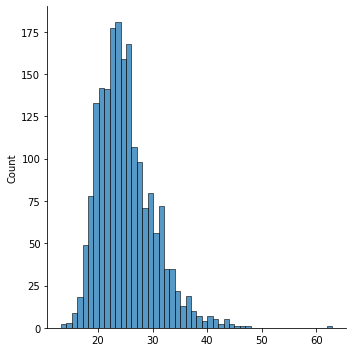

In [18]:
# Clean BMI
summarize_column(SampleMetaDataClean["BMI"])

total instances: 4347
string instances: 903
float instances: 902
unique entries: non float string instances:
['-']
float distribution:


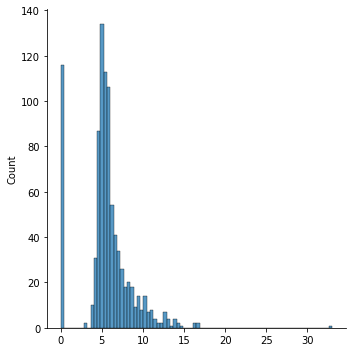

In [19]:
summarize_column(SampleMetaDataClean["FBG"])

total instances: 4347
string instances: 983
float instances: 979
unique entries: non float string instances:
['-']
float distribution:


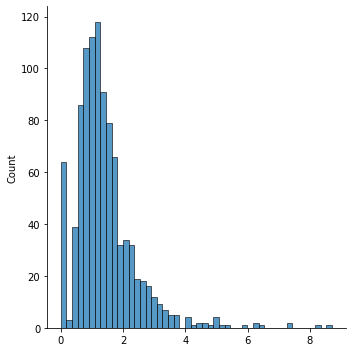

In [20]:
summarize_column(SampleMetaDataClean["TRIG"])

total instances: 4347
string instances: 982
float instances: 977
unique entries: non float string instances:
['-']
float distribution:


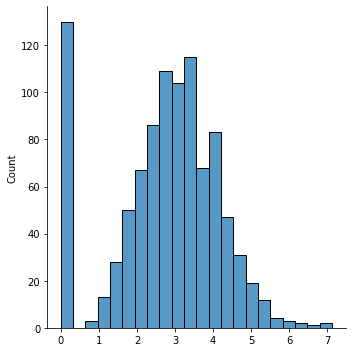

In [21]:
summarize_column(SampleMetaDataClean["LDLC"])

total instances: 4347
string instances: 980
float instances: 976
unique entries: non float string instances:
['-']
float distribution:


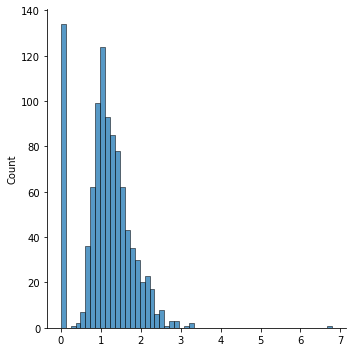

In [22]:
summarize_column(SampleMetaDataClean["HDLC"])

In [23]:
for i in range(SampleMetaDataClean.shape[0]):
    for var_name in ['BMI', 'FBG', 'TRIG', 'LDLC', 'HDLC']:
        x = SampleMetaDataClean[var_name][i]
        if isinstance(x, str):
            if re.search('^[0-9]+.*[0-9]*$', x):
                SampleMetaDataClean[var_name][i] = float(x)
            else:
                SampleMetaDataClean[var_name][i] = np.nan

In [24]:
SampleMetaDataClean["BMI"].astype(float)
SampleMetaDataClean["FBG"].astype(float)
SampleMetaDataClean["TRIG"].astype(float)
SampleMetaDataClean["LDLC"].astype(float)
SampleMetaDataClean["HDLC"].astype(float)
SampleMetaDataClean = SampleMetaDataClean.fillna(-99)
# Further clean categorical variables
SampleMetaDataClean.rename(columns={'Geographical Region or Population':'GRoP', 
                                     'Physical Exercise (Yes/No/Hours)':'Phys_Ex', 
                                     'Smoking (Yes/No)':'Smoking',
                                     'Residence (Rural/Urban)':'Residence',
                                     'Use of milk or milk products (Yes/No/Sometimes)':'milk',
                                     'Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan)':'meat',
                                     'Alcohol Consumption (Yes/No)':'alcohol',
                                     'Intervention for study (Diet)':'Diet2', 
                                     'Intervention for study (medication)':'medication'}, inplace=True)
SampleMetaDataClean["Gender"].replace({'not recorded':np.nan, 'Mismatch for Sample ID':np.nan, 'female':'F', 'male':'M'}, inplace=True)
## Replace NaN with string missing
SampleMetaDataClean = SampleMetaDataClean.fillna("missing")

In [25]:
SampleMetaDataClean['Healthy'] = SampleMetaDataClean['Phenotype']
SampleMetaDataClean['Healthy'][SampleMetaDataClean['Phenotype'].to_numpy() != 'Healthy'] = 'Unhealthy'

In [26]:
SampleMetaDataClean['Phenotype'].value_counts()

Healthy                        2636
Obesity                         342
CRC                             257
T2D                             238
Overweight                      238
ACVD                            152
Crohns disease                  108
Ulcerative colitis               96
Rheumatoid Arthritis             92
advanced adenoma                 83
Underweight                      47
IGT                              44
Symptomatic atherosclerosis      14
Name: Phenotype, dtype: int64

In [27]:
SampleMetaDataClean['Healthy'].value_counts()

Healthy      2636
Unhealthy    1711
Name: Healthy, dtype: int64

In [28]:
SampleMetaDataClean['GRoP'].value_counts()

Chinese                                         884
Israel                                          883
Netherlands                                     467
China                                           390
USA                                             289
spanish                                         186
France                                          155
Samples collected from a hospital of Austria    146
Sweden                                          145
danish                                          130
Danish population                               113
Mongolian Population                            107
White not Hispanic                               84
White                                            73
Germany                                          61
Cheyenne and Arapaho (C&A)                       36
Japanese                                         31
Canadian                                         23
HADZA                                            20
Norman      

In [29]:
SampleMetaDataClean['Phys_Ex'].value_counts()

-99               4168
Yes                122
No                  24
11–15 (h/week)      17
6–10 (h/week)        8
16–20 (h/week)       5
20+ (h/week)         3
Name: Phys_Ex, dtype: int64

In [30]:
SampleMetaDataClean['Smoking'].value_counts()

-99        4133
No          111
Yes          71
no           21
smoking      11
Name: Smoking, dtype: int64

In [31]:
SampleMetaDataClean['Residence'].value_counts()

-99      4317
Rural      20
Urban      10
Name: Residence, dtype: int64

In [32]:
SampleMetaDataClean['milk'].value_counts()

-99    4264
Yes      83
Name: milk, dtype: int64

In [33]:
SampleMetaDataClean['meat'].value_counts()

-99           4170
Yes            165
No              11
Vegetarian       1
Name: meat, dtype: int64

In [34]:
SampleMetaDataClean['alcohol'].value_counts()

-99                                  4281
Yes                                    33
1–5 (alcohol beverages per week)       21
No                                      9
6–10 (alcohol beverages per week)       2
15+ (alcohol beverages per week)        1
Name: alcohol, dtype: int64

In [35]:
SampleMetaDataClean['Diet2'].value_counts()

No     4065
-99     282
Name: Diet2, dtype: int64

In [36]:
SampleMetaDataClean['Gender'].value_counts()

-99        2118
M          1165
F          1050
missing      14
Name: Gender, dtype: int64

In [37]:
SampleMetaDataClean['medication'].value_counts()

No     3973
-99     374
Name: medication, dtype: int64

## Examine Select Metadata for Set of Healthy + ACVD Patients

In [38]:
# 152 patients from V-2 ACVD study are all we have for ACVD
SampleMetaDataClean['study'][SampleMetaDataClean['Phenotype'] == 'ACVD'].value_counts()

V-2_ACVD    152
Name: study, dtype: int64

In [39]:
SampleMetaDataClean['study'][SampleMetaDataClean['Phenotype'] == 'Healthy'].value_counts()

V-25_Healthy                           883
V-22_Healthy                           467
V-23 & V-24 (HMP1 and HMP2)_Healthy    222
S-8_Healthy                            107
V-12_Healthy                           101
V-10_Healthy                            92
V-44_Healthy                            89
V-2_Healthy                             75
V-8_Healthy                             61
V-16_Healthy                            58
V-29_Healthy                            55
V-6_Healthy                             42
V-46_Healthy                            39
S-7_Healthy                             39
V-38_Healthy                            35
V-15_Healthy                            33
V-1_Healthy                             30
V-43_Healthy                            30
V-32_Healthy                            26
V-19_Healthy                            21
V-18_Healthy                            20
V-33_Healthy                            19
V-9_Healthy                             18
V-48_Health

total instances: 2636
string instances: 2636
float instances: 585
unique entries: non float string instances:
['-99.0']
float distribution:


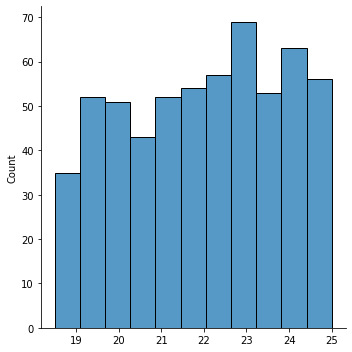

In [40]:
summarize_column(SampleMetaDataClean['BMI'][SampleMetaDataClean['Phenotype'] == 'Healthy'].astype('str'))

total instances: 152
string instances: 152
float instances: 144
unique entries: non float string instances:
['-99.0']
float distribution:


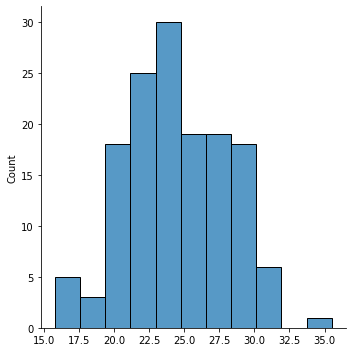

In [41]:
summarize_column(SampleMetaDataClean['BMI'][SampleMetaDataClean['Phenotype'] == 'ACVD'].astype('str'))

In [42]:
SampleMetaDataClean['Gender'][SampleMetaDataClean['Phenotype'] == 'Healthy'].value_counts()

-99        1674
M           478
F           471
missing      13
Name: Gender, dtype: int64

In [43]:
SampleMetaDataClean['Gender'][SampleMetaDataClean['Phenotype'] == 'ACVD'].value_counts()

M    109
F     43
Name: Gender, dtype: int64

In [53]:
SampleMetaDataClean['GRoP'][SampleMetaDataClean['Phenotype'] == 'Healthy'].value_counts()

Israel                                          883
Netherlands                                     467
Chinese                                         276
USA                                             274
China                                           182
Mongolian Population                            107
spanish                                          98
danish                                           49
France                                           43
Danish population                                39
White not Hispanic                               29
Japanese                                         26
Sweden                                           23
Samples collected from a hospital of Austria     21
HADZA                                            20
Canadian                                         19
Korea                                            16
White                                            16
Sardinian Population                             13
Norman      

In [54]:
# All ACVD patients are Chinese. We need to evaluate chinese vs chinese performance
SampleMetaDataClean['GRoP'][SampleMetaDataClean['Phenotype'] == 'ACVD'].value_counts()

Chinese    152
Name: GRoP, dtype: int64

For ACVD vs Healthy, Male/Female and BMI seem to be the only thing that really we have a lot of data for. I'm worried about using samples with clinical data mixed with samples that don't have clinical data as performance accuracy will likely suffer in cases where clinical data is unavailable.

# View Results and Save Data

In [44]:
MatrixDataClean

array([[0.01142, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.00088, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]])

In [45]:
MatrixDataClean.shape

(4347, 903)

In [46]:
FeatMetaDataClean

,feature
s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
s__Acetobacter_unclassified,s__Acetobacter_unclassified
s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
s__Achromobacter_unclassified,s__Achromobacter_unclassified
s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans
...,...
s__Weissella_koreensis,s__Weissella_koreensis
s__Weissella_paramesenteroides,s__Weissella_paramesenteroides
s__Weissella_unclassified,s__Weissella_unclassified
s__Wohlfahrtiimonas_chitiniclastica,s__Wohlfahrtiimonas_chitiniclastica


In [47]:
FeatMetaDataClean.shape

(903, 1)

In [48]:
SampleMetaDataClean

,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),Subject Id (If available),...,milk,meat,alcohol,Diet1,Diet2,medication,Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control,Healthy
6,,,,,,,,,,,,,,,,,,,,,
SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,ZSL-004,...,-99,-99,-99,-99,-99,-99,Illumina HiSeq 2000,PAIRED,43356775,Unhealthy
SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,ZSL-007,...,-99,-99,-99,-99,-99,-99,Illumina HiSeq 2000,PAIRED,41073871,Unhealthy
SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,ZSL-010,...,-99,-99,-99,-99,-99,-99,Illumina HiSeq 2000,PAIRED,40199673,Unhealthy
SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,ZSL-011,...,-99,-99,-99,-99,-99,-99,Illumina HiSeq 2000,PAIRED,31054158,Unhealthy
SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,ZSL-019,...,-99,-99,-99,-99,-99,-99,Illumina HiSeq 2000,PAIRED,36081150,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA4431948,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,GZCT014,...,-99,-99,-99,-99,No,No,Illumina HiSeq 2000,PAIRED,52212493,Unhealthy
SAMEA4431949,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,GZCT015,...,-99,-99,-99,-99,No,No,Illumina HiSeq 2000,PAIRED,50635879,Unhealthy
SAMEA4431951,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,GZCT017,...,-99,-99,-99,-99,No,No,Illumina HiSeq 2000,PAIRED,40712962,Unhealthy


In [49]:
SampleMetaDataClean.shape

(4347, 33)

In [50]:
np.savetxt(X=MatrixDataClean, fname=os.path.join(output_dir, 'MatrixDataClean.csv'))
FeatMetaDataClean.to_csv(os.path.join(output_dir, 'FeatMetaDataClean.csv'))
SampleMetaDataClean.to_csv(os.path.join(output_dir, 'SampleMetaDataClean.csv'))

# Add additional columns to SampleMetaData

In [51]:
data_mung(os.path.join(output_dir, 'SampleMetaDataClean.csv')).group_age()
data_mung(os.path.join(output_dir, 'SampleMetaDataClean.csv')).categorize_age()

INFO: Saving Age Groups to file...
INFO: Saving Age Categories to file...
